<font size ="6"> **Polynomial Regression for Salary Prediction** </font>

## Importing Libraries and dataset

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv("Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [94]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [95]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## Data relations

Text(0.5, 1, 'Corelation of variables')

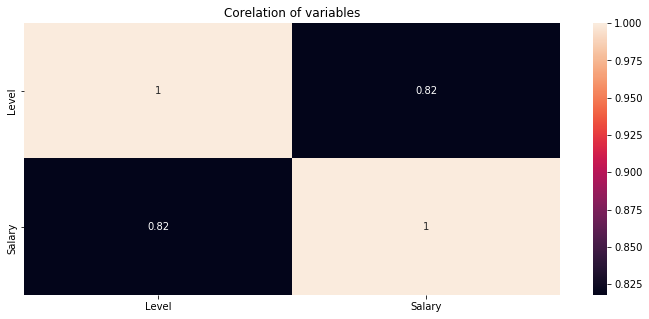

In [96]:
data_corr = data.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data_corr,annot=True)
plt.title("Corelation of variables")
# plt.show()

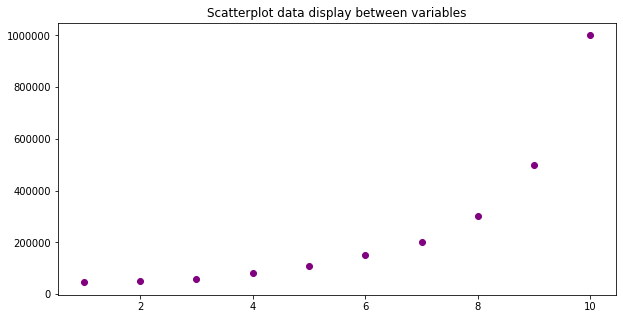

In [97]:
plt.figure(figsize=(10,5))
plt.title("Scatterplot data display between variables")
plt.scatter(data.Level,data.Salary,c='purple')
plt.show()

In [98]:
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values

#  Linear Regression

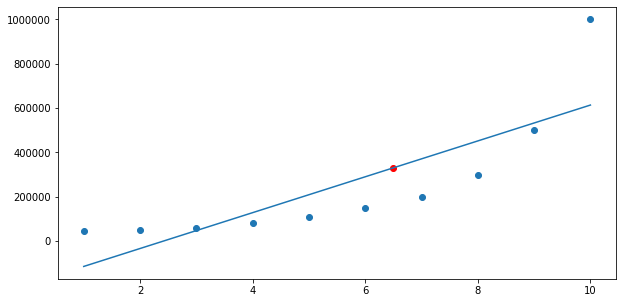

The predicted salary value for a person at 6.5 by Linear Regression is [330378.78787879]


In [99]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X,y)

plt.figure(figsize=(10,5))
plt.scatter(X,y)
res_predict = lreg.predict(X) 
plt.plot(X,res_predict)

plt.scatter(6.5,lreg.predict([[6.5]]),c='red')
plt.show()
print("The predicted salary value for a person at 6.5 by Linear Regression is",lreg.predict([[6.5]]))

In [100]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
print("Accuracy score : {}".format(lreg.score(X,y)))
print("RMS error : {}".format(np.sqrt(mean_squared_error(y,res_predict))))
print("R2 score: {}".format(r2_score(y,res_predict)))

Accuracy score : 0.6690412331929895
RMS error : 163388.73519272613
R2 score: 0.6690412331929895


# Polynomial Regression

In [101]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1508: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  n_samples, n_features = check_array(X, accept_sparse=True).shape


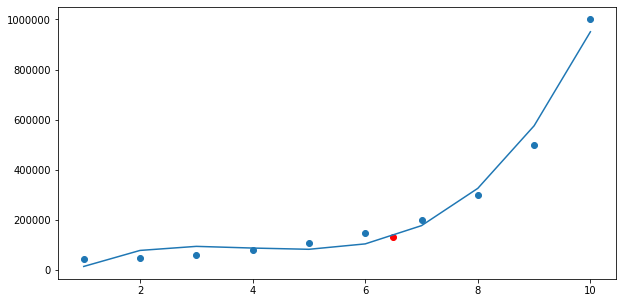

The predicted salary values for a person at 6.5 by Polynomial Regression is [133259.46969697]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1508: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  n_samples, n_features = check_array(X, accept_sparse=True).shape


In [102]:
lreg2 = LinearRegression()
lreg2.fit(X_poly,y)

plt.figure(figsize=(10,5))
plt.scatter(X,y)
poly_res_predict = lreg2.predict(X_poly)
plt.plot(X,poly_res_predict)

plt.scatter(6.5,lreg2.predict(polyreg.fit_transform([['6.5']])),c='red')
plt.show()

print("The predicted salary values for a person at 6.5 by Polynomial Regression is",lreg2.predict(polyreg.fit_transform([['6.5']])))

In [103]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
print("Accuracy score : {}".format(lreg.score(X,y)))
print("rms error : {}".format(np.sqrt(mean_squared_error(y,poly_res_predict))))
print("r2 Score : {}".format(r2_score(y,poly_res_predict)))

Accuracy score : 0.6690412331929895
rms error : 38931.504012329184
r2 Score : 0.9812097727913367
